## 数据分析部分

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import load_wine


In [2]:
# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision',3) 


In [3]:
df = pd.read_csv('.\winequality-red.csv',sep = ';')
display(df.head())
print('数据的维度：',df.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


数据的维度： (1599, 12)


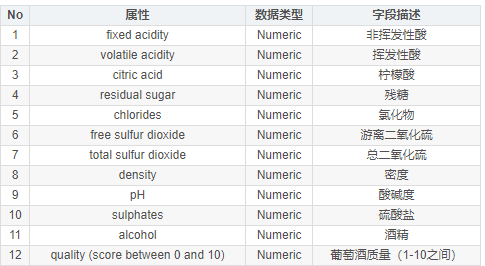

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [6]:
print('quality的取值：',df['quality'].unique())
print('quality的取值个数：',df['quality'].nunique())
print(df.groupby('quality').mean())

quality的取值： [5 6 7 4 8 3]
quality的取值个数： 6
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                8.360             0.885        0.171           2.635   
4                7.779             0.694        0.174           2.694   
5                8.167             0.577        0.244           2.529   
6                8.347             0.497        0.274           2.477   
7                8.872             0.404        0.375           2.721   
8                8.567             0.423        0.391           2.578   

         chlorides  free sulfur dioxide  total sulfur dioxide  density     pH  \
quality                                                                         
3            0.123               11.000                24.900    0.997  3.398   
4            0.091               12.264                36.245    0.997  3.382   
5            0.093               16.984          

显示各个变量的直方图

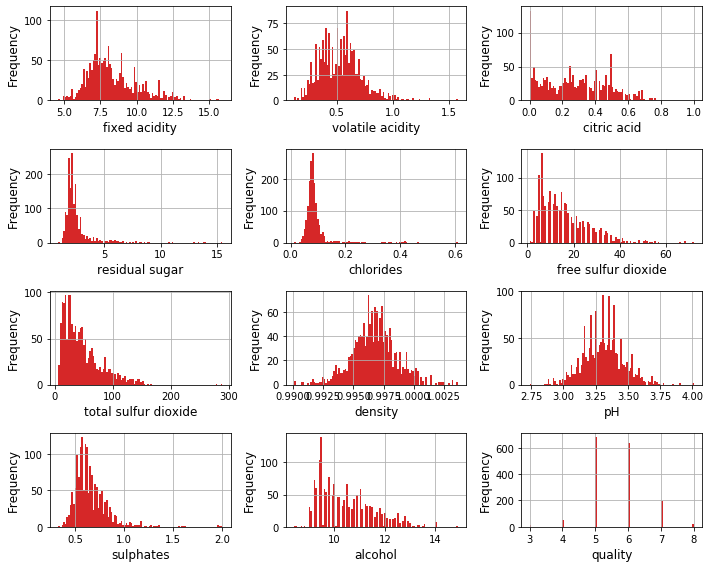

In [7]:
color = sns.color_palette()
column= df.columns.tolist()
fig = plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    df[column[i]].hist(bins = 100,color = color[3])
    plt.xlabel(column[i],fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
plt.tight_layout()

显示各个变量的盒图

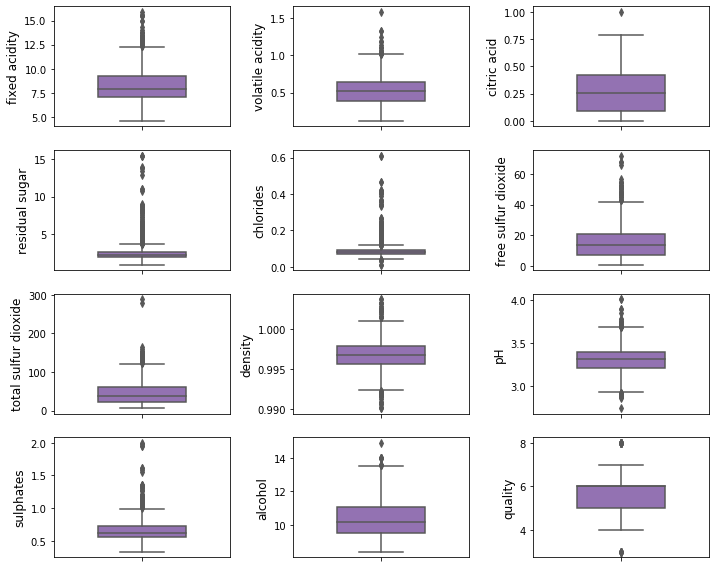

In [8]:
fig = plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[column[i]],orient = 'v',width = 0.5,color = color[4])
    plt.ylabel(column[i],fontsize = 12)
plt.tight_layout()

酸性相关的特征分析
该数据集与酸度相关的特征有’fixed acidity’, ‘volatile acidity’, ‘citric acid’,‘chlorides’, ‘free sulfur dioxide’, ‘total sulfur dioxide’,‘PH’。其中前6中酸度特征都会对PH产生影响。PH在对数尺度，然后对6中酸度取对数做直方图。

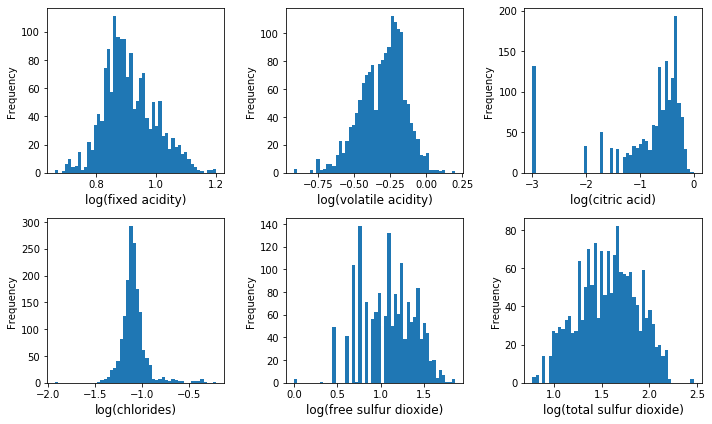

In [9]:
acidityfeat = ['fixed acidity', 
				'volatile acidity', 
				'citric acid', 
				'chlorides', 
				'free sulfur dioxide', 
				'total sulfur dioxide',]

fig = plt.figure(figsize = (10,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acidityfeat[i]].values,a_min = 0.001,a_max = None))
    plt.hist(v,bins = 50,color = color[0])
    plt.xlabel('log('+ acidityfeat[i] +')',fontsize = 12)
    plt.ylabel('Frequency')    
plt.tight_layout()

Figure 4


'\npH值主要是与fixed acidity有关，\nfixed acidity比volatile acidity和citric acid高1到2个数量级(Figure 4)，比free sulfur dioxide, total sulfur dioxide, sulphates高3个数量级。\n   一个新特征total acid来自于前三个特征的和。\n'

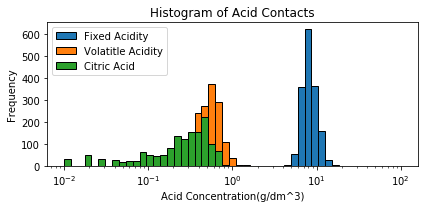

In [10]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2,2)) # linspace 默认50等分
plt.hist(df['fixed acidity'], bins=bins, edgecolor = 'k', label='Fixed Acidity') #bins: 直方图的柱数，可选项，默认为10
plt.hist(df['volatile acidity'], bins=bins, edgecolor = 'k', label='Volatitle Acidity')#label:字符串或任何可以用'%s'转换打印的内容。
plt.hist(df['citric acid'], bins=bins, edgecolor = 'k', label='Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration(g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Contacts')#title ：图形标题
plt.legend()#plt.legend（）函数主要的作用就是给图加上图例
plt.tight_layout()

print('Figure 4')
"""
pH值主要是与fixed acidity有关，
fixed acidity比volatile acidity和citric acid高1到2个数量级(Figure 4)，比free sulfur dioxide, total sulfur dioxide, sulphates高3个数量级。
   一个新特征total acid来自于前三个特征的和。
"""

甜度（sweetness）
residual sugar主要与酒的甜度有关，干红（<= 4g/L），半干（4-12g/L），半甜（12-45g/L），甜（>= 45g/L），该数据集中没有甜葡萄酒。

In [11]:
df['sweetness'] = pd.cut(df['residual sugar'],bins = [0,4,12,45],labels = ['dry','semi-dry','semi-sweet'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,dry
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,dry
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,dry
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry


Figure 5


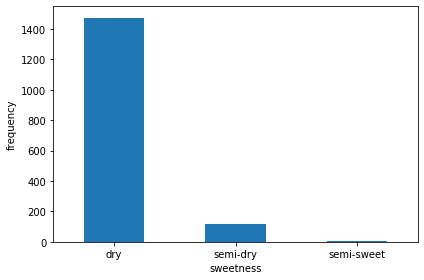

In [12]:
plt.figure(figsize = (6,4))
df['sweetness'].value_counts().plot(kind = 'bar',color = color[0])
plt.xticks(rotation = 0)
plt.xlabel('sweetness')
plt.ylabel('frequency')
plt.tight_layout()
print('Figure 5')

Figure 7:PhysicoChemico Propertise and Wine Quality by Boxplot


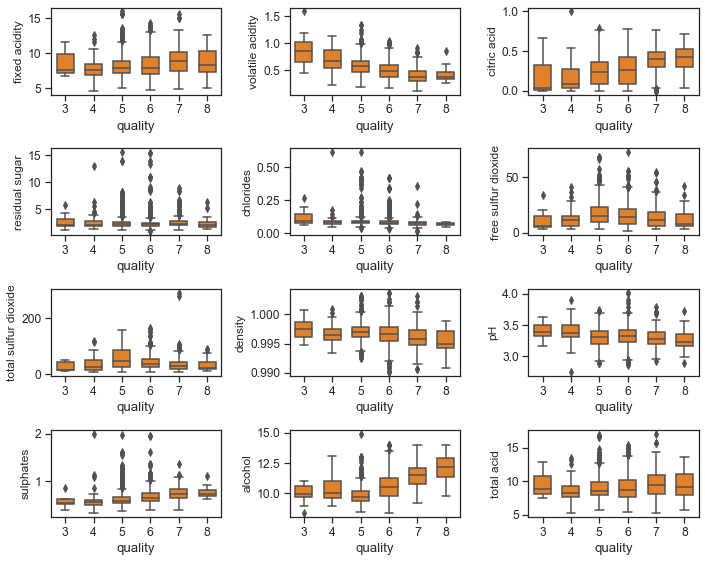

In [13]:
# 创建一个新特征total acid
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

columns = df.columns.tolist()
columns.remove('sweetness')
# columns

# ['fixed acidity',
#  'volatile acidity',
#  'citric acid',
#  'residual sugar',
#  'chlorides',
#  'free sulfur dioxide',
#  'total sulfur dioxide',
#  'density',
#  'pH',
#  'sulphates',
#  'alcohol',
#  'quality',
#  'total acid']
sns.set_style('ticks')
sns.set_context('notebook',font_scale = 1.1)

column = columns[0:11] + ['total acid']
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = 'quality',y = column[i], data = df,color = color[1],width = 0.6)
    plt.ylabel(column[i],fontsize = 12)
plt.tight_layout()

print('Figure 7:PhysicoChemico Propertise and Wine Quality by Boxplot')

从上图可以看出：

红酒品质与柠檬酸，硫酸盐，酒精度成正相关
红酒品质与易挥发性酸，密度，PH成负相关
残留糖分，氯离子，二氧化硫对红酒品质没有什么影响

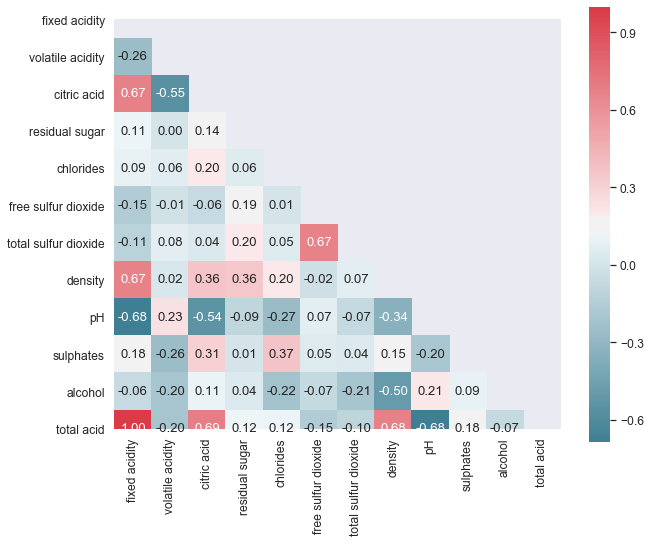

In [14]:
sns.set_style('dark')
plt.figure(figsize = (10,8))
mcorr = df[column].corr()
mask = np.zeros_like(mcorr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')

# print('Figure 8:Pairwise colleration plot')

(7, 16)

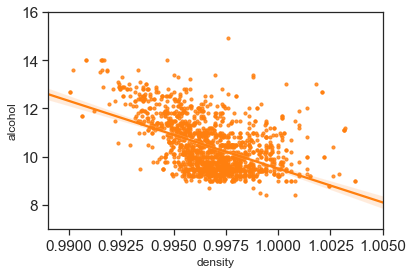

In [15]:
# 密度和酒精浓度
# 密度和酒精浓度是相关的，物理上，但两者并不是线性关系。另外密度还与酒精中的其中物质含量有关，但是相关性很小。

sns.set_style('ticks')
sns.set_context('notebook',font_scale = 1.4)

plt.figure(figsize = (6,4))
sns.regplot(x = 'density',y = 'alcohol',data = df,scatter_kws = {'s':10},color = color[1])
plt.xlabel('density',fontsize = 12)
plt.ylabel('alcohol',fontsize = 12)

plt.xlim(0.989,1.005)
plt.ylim(7,16)

# print('Figure 9: Density vs Alcohol')

酸性物质含量和PH
因为PH和非挥发性酸之间存在着-0.68的相关性，因为非挥发性酸的总量特别高，所以total acid这个指标意义不大。

In [16]:
column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'total acid']

Figure 10:The correlation between different acid and PH


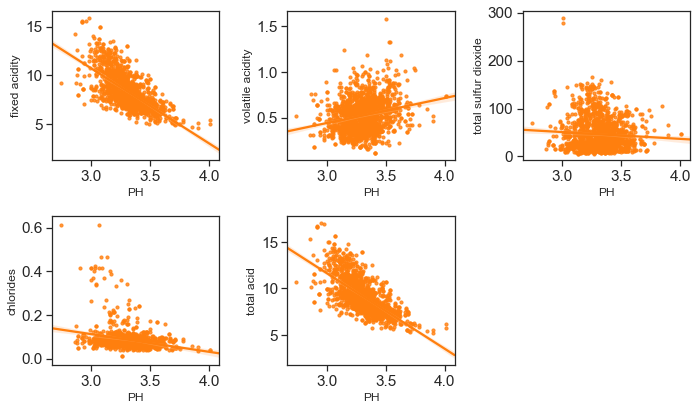

In [17]:
acidity_raleted = ['fixed acidity','volatile acidity','total sulfur dioxide','chlorides','total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x = 'pH',y = acidity_raleted[i],data = df,scatter_kws = {'s':10},color = color[1])
    plt.xlabel('PH',fontsize = 12)
    plt.ylabel(acidity_raleted[i],fontsize = 12)
    
plt.tight_layout()
print('Figure 10:The correlation between different acid and PH')

多变量分析
与红酒品质相关性最高的三个特征分别是酒精浓度，挥发性酸含量，柠檬酸。下面研究三个特征对红酒的品质有何影响。

d:\Users\wx165\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Figure 11-1:scatter plot between alcohol and volatile acidity and quality


<Figure size 432x288 with 0 Axes>

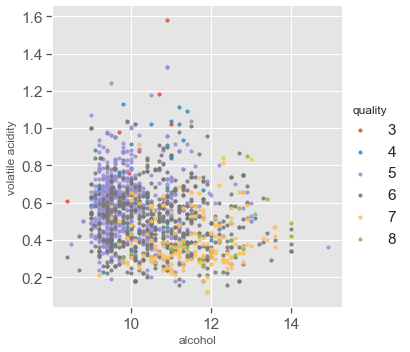

In [18]:
plt.style.use('ggplot')

plt.figure(figsize = (6,4))
sns.lmplot(x = 'alcohol',y = 'volatile acidity',hue = 'quality',data = df,fit_reg = False,scatter_kws = {'s':10},size = 5)
print('Figure 11-1:scatter plot between alcohol and volatile acidity and quality')

Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality


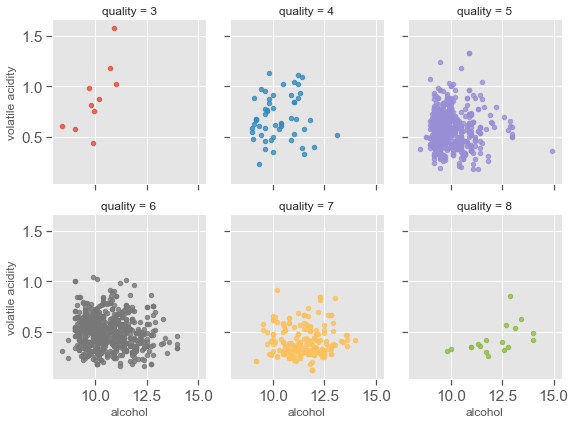

In [19]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', 
           data = df,fit_reg = False, size = 3,  aspect = 0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality")

PH和非挥发性酸，柠檬酸
PH和非挥发性酸，柠檬酸成负相关。

Figure 12: pH with Fixed Acidity and Citric Acid


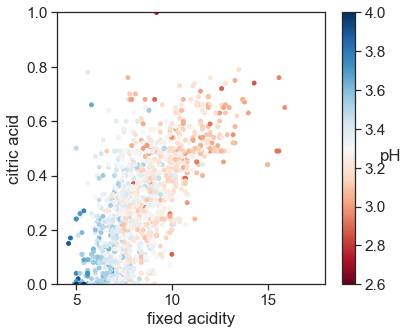

In [20]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(df['fixed acidity'], df['citric acid'], c=df['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid')

总结
对于红酒品质影响最重要的三个特征：酒精度、挥发性酸含量和柠檬酸。对于品质高于7的优质红酒和品质低于4的劣质红酒，直观上线性可分，对于品质为5和6的红酒很难进行线性区分。

## 数据挖掘时间部分

In [21]:
# 数据建模
# 线性回归
# 集成算法
# 提升算法
# 模型评估
# 确定模型参数
# 1.数据集切分
# 1.1 切分特征和标签

# 1.2 切分训练集个测试集

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness,total acid
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,dry,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,dry,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,dry,12.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10


In [22]:
# 数据预处理工作

# 检查数据的完整性
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
sweetness               0
total acid              0
dtype: int64

In [23]:
# 将object类型的数据转化为int类型
sweetness = pd.get_dummies(df['sweetness'])
df = pd.concat([df,sweetness],axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sweetness,total acid,dry,semi-dry,semi-sweet
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,dry,8.68,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,dry,8.60,1,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,dry,12.04,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,dry,8.10,1,0,0


In [24]:
df = df.drop('sweetness',axis = 1)
labels = df['quality']
features = df.drop('quality',axis = 1)
# 对原始数据集进行切分
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.3,random_state = 0)

print('训练特征的规模:',train_features.shape)
print('训练标签的规模:',train_labels.shape)
print('测试特征的规模:',test_features.shape)
print('测试标签的规模:',test_labels.shape)

训练特征的规模: (1119, 15)
训练标签的规模: (1119,)
测试特征的规模: (480, 15)
测试标签的规模: (480,)


In [25]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma=0.1)
classifier.fit(train_features,train_labels)
print('训练集的准确率',classifier.score(train_features,train_labels))
print('测试集的准确率',classifier.score(test_features,test_labels))

训练集的准确率 0.5924932975871313
测试集的准确率 0.6229166666666667


In [26]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train_features,train_labels)

prediction = LR.predict(test_features)
prediction[:5]

array([5.75571751, 4.82871294, 6.59036909, 5.36644662, 5.89993476])

In [27]:
#对模型进行评估
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(test_labels,prediction))
print('线性回归模型的预测误差:',RMSE)


线性回归模型的预测误差: 0.6332278109768248


In [28]:
# 对训练特征和测试特征做标准化处理，观察结果

from sklearn.preprocessing import StandardScaler
train_features_std = StandardScaler().fit_transform(train_features)
test_features_std = StandardScaler().fit_transform(test_features)
LR = LinearRegression()
LR.fit(train_features_std,train_labels)
prediction = LR.predict(test_features_std)

#观察预测结果误差
RMSE = np.sqrt(mean_squared_error(prediction,test_labels))
print('线性回归模型预测误差:',RMSE)

线性回归模型预测误差: 0.6351421172394885


对比原始数据与做了标准化处理的数据，其结果相差不大，所以该数据集不需要做标准化处理。

集成算法：随机森林

In [29]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(train_features,train_labels)
prediction = RF.predict(test_features)
RMSE = np.sqrt(mean_squared_error(prediction,test_labels))
print('随机森林模型的预测误差:',RMSE)

随机森林模型的预测误差: 0.6396613687465162


d:\Users\wx165\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
RF.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100,200,300,400,500],
             'max_depth':[3,4,5,6],
             'min_samples_split':[2,3,4]}

RF = RandomForestRegressor()
grid = GridSearchCV(RF,param_grid = param_grid,scoring = 'neg_mean_squared_error',cv = 3,n_jobs = -1)
grid.fit(train_features,train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
      

In [32]:


# GridSearchCV(cv=3, error_score='raise-deprecating',
#        estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
#            oob_score=False, random_state=None, verbose=0, warm_start=False),
#        fit_params=None, iid='warn', n_jobs=-1,
#        param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring='neg_mean_squared_error', verbose=0)

In [33]:
grid.best_params_

{'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 100}

In [34]:
RF = RandomForestRegressor(n_estimators = 300,min_samples_split = 2,max_depth = 6)

RF.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [35]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
prediction = RF.predict(test_features)

RF_RMSE = np.sqrt(mean_squared_error(prediction,test_labels))
print('随机森林模型的预测误差:',RF_RMSE)

随机森林模型的预测误差: 0.6161140623591391


集成算法：GBDT

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

GBDT = GradientBoostingRegressor()
GBDT.fit(train_features,train_labels)
gbdt_prediction = GBDT.predict(test_features)
gbdt_RMSE = np.sqrt(mean_squared_error(gbdt_prediction,test_labels))

print('GBDT模型的预测误差:',gbdt_RMSE)

GBDT模型的预测误差: 0.6266032871358388


In [38]:
GBDT.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>